In [2]:
# run_basset
import anndata
import h5py
import scipy
import os
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import pandas as pd
from sklearn.metrics import silhouette_score

ad_atac = anndata.read_h5ad('/home/yuanh/sc_basset/datasets/10x_ARC_mouse_brain/ad_atac.h5ad')
ad_rna = anndata.read_h5ad('/home/yuanh/sc_basset/datasets/10x_ARC_mouse_brain/scvi/ad_rna_scvi.h5ad')
ad_atac.obs['leiden_rna'] = ad_rna.obs['leiden'].values


# copied from https://github.com/pinellolab/scATAC-benchmarking/blob/master/Synthetic_Data/BoneMarrow_clean/run_clustering_bonemarrow_clean.ipynb
def getNClusters_leiden(adata,n_cluster,range_min=0,range_max=3,max_steps=20):
    this_step = 0
    this_min = float(range_min)
    this_max = float(range_max)
    while this_step < max_steps:
        this_resolution = this_min + ((this_max-this_min)/2)
        sc.tl.leiden(adata,resolution=this_resolution)
        this_clusters = adata.obs['leiden'].nunique()
        if this_clusters > n_cluster:
            this_max = this_resolution
        elif this_clusters < n_cluster:
            this_min = this_resolution
        else:
            return(this_resolution, adata)
        this_step += 1
    return (None, None)

In [4]:
ad_atac.obsm['projection'] = pd.read_csv('projection.csv', index_col=0).values
sc.pp.neighbors(ad_atac, use_rep='projection')

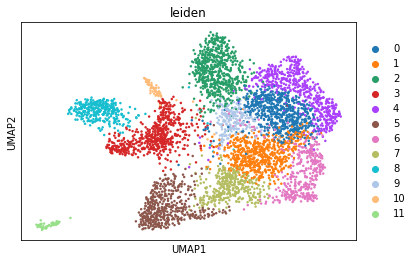

In [6]:
sc.tl.leiden(ad_atac)
sc.tl.umap(ad_atac)
sc.pl.umap(ad_atac, color='leiden')